LeNet CNN Model

In [36]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
from keras import layers
import os,cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_path = '/content/drive/MyDrive/Dataset/chest_xray/train'
valid_path = '/content/drive/MyDrive/Dataset/chest_xray/test'

In [3]:
folders = glob('/content/drive/MyDrive/Dataset/chest_xray/train/*')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:


#  Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5,5), input_shape=(28,28,3),strides=(1,1),activation='tanh', padding='same'))

# Pooling 1
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
 

    #2nd Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5,5),strides=(1,1),activation='tanh', padding='valid'))
#model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1),activation='tanh' padding='valid'))
 
# Pooling 2
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
 
# fully connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), padding='valid'))
# flatten the cnn output so that we can connect with the fully connected Convolutional Layer
model.add(layers.Flatten())
# 1st Dense Layer(2nd fully connected Convolutional Layer)
model.add(layers.Dense(84,activation='tanh'))
 
 # Output Layer
 
model.add(layers.Dense(1,activation='sigmoid'))
#model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 27, 27, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 11, 11, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 5880)              0

In [6]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [7]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5302 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',
                                            target_size = (28, 28),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 654 images belonging to 2 classes.


In [10]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch= len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
166/166 [==============================] - 1196s 7s/step - loss: 0.4059 - accuracy: 0.8231 - val_loss: 0.3890 - val_accuracy: 0.8165
Epoch 2/20
166/166 [==============================] - 98s 590ms/step - loss: 0.2574 - accuracy: 0.8925 - val_loss: 0.3197 - val_accuracy: 0.8609
Epoch 3/20
166/166 [==============================] - 97s 585ms/step - loss: 0.2563 - accuracy: 0.8904 - val_loss: 0.3702 - val_accuracy: 0.8440
Epoch 4/20
166/166 [==============================] - 101s 609ms/step - loss: 0.2466 - accuracy: 0.8942 - val_loss: 0.5287 - val_accuracy: 0.7905
Epoch 5/20
166/166 [==============================] - 98s 591ms/step - loss: 0.2252 - accuracy: 0.9074 - val_loss: 0.3614 - val_accuracy: 0.8670
Epoch 6/20
166/166 [==============================] - 97s 587ms/step - loss: 0.2271 - accuracy: 0.9036 - val_loss: 0.3476 - val_accuracy: 0.8440
Epoch 7/20
166/166 [==============================] - 98s 587ms/step - loss: 0.2095 - accuracy: 0.9129 - val_loss: 0.3913 - val_ac

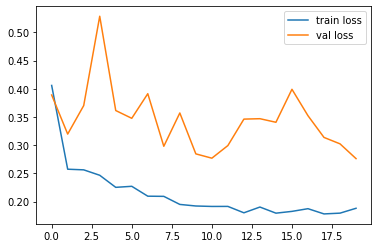

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

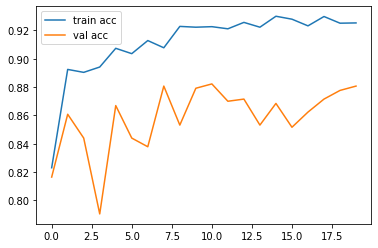

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from PIL.Image import NORMAL
test_data=[]
test_labels=[]
for i in ['/NORMAL/', '/PNEUMONIA/']:
    for img in (os.listdir('/content/drive/MyDrive/Dataset/chest_xray/test/' +i)):
        img=plt.imread('/content/drive/MyDrive/Dataset/chest_xray/test/'+ i+img)
        img= cv2.resize(img, (28,28))
        img= np.dstack([img, img,img])
        img=img.astype('float32')/ 255
        if i=='/NORMAL/':
          label=0
        elif i=='/PNEUMONIA/':
          label=1
        test_data.append(img)
        test_labels.append(label)

In [18]:
test_data=np.array(test_data)
test_labels=np.array(test_labels)

In [19]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
preds= model.predict(test_data)
acc= accuracy_score(test_labels,np.round(preds))*100
cm=confusion_matrix(test_labels,np.round(preds))
tp, fp,fn,tn= cm.ravel()
print("confusion_matrix===========")
print(cm)
print("\ntest_matrix==============")
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
sensitivity=tn/(tn+fp)
print('accuracy: {}%'.format(acc))
print('precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-scor: {}%'.format(2*precision*recall/(precision+recall)))

print('\n train matrix===========')
print('train acc:{}'.format(np.round((r.history['accuracy'][-1])*100,2)))


confusion_matrix===========
[[198  44]
 [ 35 377]]

test_matrix==============
accuracy: 87.92048929663608%
precision: 81.81818181818183%
Recall: 84.97854077253218%
F1-scor: 83.36842105263159%

 train matrix===========
train acc:92.53


In [20]:
print(classification_report(test_labels,np.round(preds),target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.85      0.82      0.83       242
   Pneumonia       0.90      0.92      0.91       412

    accuracy                           0.88       654
   macro avg       0.87      0.87      0.87       654
weighted avg       0.88      0.88      0.88       654



<Figure size 432x288 with 0 Axes>

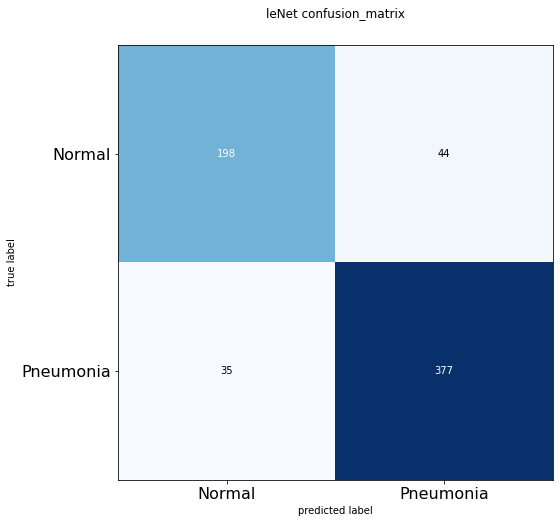

In [30]:
from mlxtend.plotting import plot_confusion_matrix
plt.figure()

plot_confusion_matrix(cm, figsize=(12,8),hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.yticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.title("leNet confusion_matrix")

plt.show()

In [22]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_LeNet.h5')

In [23]:
from keras.models import load_model

In [24]:
from keras.preprocessing import image


In [126]:
model=load_model('model_LeNet.h5')

In [134]:
img=image.load_img('/content/drive/MyDrive/Dataset/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg',target_size=(28,28))
#img_path=input("enter image")
#img=image.load_img(img_path,target_size=(224,224))

In [135]:
x=image.img_to_array(img)

In [136]:
x=np.expand_dims(x, axis=0)

In [137]:
img_data=preprocess_input(x)

In [138]:
classes=model.predict(img_data)

In [ ]:
texted_img=cv2.putText(img=np.copy(img_data),org=(50,50),fontFace=0, fontScale=1,color=(0,0,2), text=str(x))
plt.imshow(texted_img)

In [139]:
result=int(classes[0][0])
result

0

In [140]:
if result==1:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal
